# Previsão de Vitória no Esporte

## Imports das bibliotecas necessárias

In [1]:
import pandas as pd
%matplotlib inline

## Leitura dos dados e visualização dos dados  
As colunas ```home_score``` e ```away_score``` foram retiradas porque se não o modelo ia "saber" o resultado final e com isso teria 100% de acurácia sempre.

In [2]:
data = pd.read_json('base-dados-clube-da-aposta.json')
data.drop(['home_score', 'away_score'], axis=1)
data.head()

,home_name,away_name,home_score,away_score,final_result,time,home_pos,away_pos,round,home_last5all_home,...,fifa_home_mid,fifa_home_def,fifa_away_ova,fifa_away_att,fifa_away_mid,fifa_away_def,elo_home_score,elo_away_score,tfm_value_home,tfm_value_away
0,FC Porto,Nacional,3,1,H,1546895700,1,11,16,9,...,81,80,70,70,70,69,1813.906738,1392.986084,2.779800e+08,9450000.0
1,Tenerife,Elche,2,1,H,1546632000,18,15,20,2,...,71,69,67,69,67,67,1513.179932,1475.512939,1.090000e+07,9600000.0
10,Man City,Everton,3,1,H,1544877000,2,7,17,16,...,88,83,79,79,80,79,1986.672974,1699.472778,1.090000e+09,426000000.0
100,Braga,FC Porto,0,1,A,1503861300,6,3,4,3,...,75,74,79,78,79,79,1562.021240,1745.115723,5.740000e+07,177650000.0
1000,Red Star FC 93,Strasbourg,1,1,D,1487358000,16,6,26,0,...,66,67,66,68,67,66,1407.163086,1422.037231,1.210000e+07,9850000.0


### Visualização da quantidade de classes no dataset

Visualização das informações em texto

In [3]:
n_records = data.shape[0]

home, draw, away = data['final_result'].value_counts()

# Exibindo os resultados
print ("Número total de dados: {}".format(n_records))
print ("Total de Vitória do Mandante: {}".format(home))
print ("Total de Empate: {}".format(draw))
print ("Total de Vitória do Visitante: {}".format(away))

Número total de dados: 5163
Total de Vitória do Mandante: 2306
Total de Empate: 1500
Total de Vitória do Visitante: 1357


É interessante visualizar os dados através de um gráfico, o que é feito abaixo:

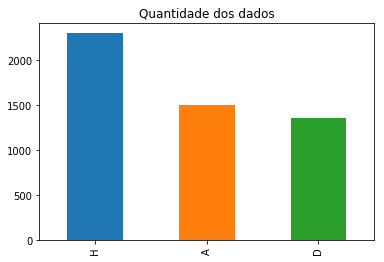

In [4]:
data['final_result'].value_counts().plot(kind='bar', title='Quantidade dos dados')

Informações das variáveis e dos respectivos tipos:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 999
Data columns (total 30 columns):
home_name                  5163 non-null object
away_name                  5163 non-null object
home_score                 5163 non-null int64
away_score                 5163 non-null int64
final_result               5163 non-null object
time                       5163 non-null int64
home_pos                   5163 non-null int64
away_pos                   5163 non-null int64
round                      5163 non-null int64
home_last5all_home         5163 non-null int64
home_last5all_home_win     5163 non-null int64
home_last5all_home_draw    5163 non-null int64
home_last5all_home_lose    5163 non-null int64
away_last5all_away         5163 non-null int64
away_last5all_away_win     5163 non-null int64
away_last5all_away_draw    5163 non-null int64
away_last5all_away_lose    5163 non-null int64
last5all_home_away_dif     5163 non-null int64
fifa_home_ova              5163 non-null int6

## Préprocessamento dos dados

Nessa célula todos os valores que são cadeias de caracteres são transformados em inteiros por meio da função ```LabelEnconder```.

In [6]:
from sklearn import preprocessing

income_raw = data['final_result']
features = data.drop('final_result', axis = 1)

le_away = preprocessing.LabelEncoder()
features['away_name'] = le_away.fit_transform(features['away_name'])

le_home = preprocessing.LabelEncoder()
features['home_name'] = le_home.fit_transform(features['home_name'])

le = preprocessing.LabelEncoder()
income = le.fit_transform(income_raw)

print("Classes: {}".format(list(le.classes_)))

Classes: ['A', 'D', 'H']


*Features* com os dados pré processados:

In [14]:
features.head()

,home_name,away_name,home_score,away_score,time,home_pos,away_pos,round,home_last5all_home,home_last5all_home_win,...,fifa_home_mid,fifa_home_def,fifa_away_ova,fifa_away_att,fifa_away_mid,fifa_away_def,elo_home_score,elo_away_score,tfm_value_home,tfm_value_away
0,87,157,3,1,1546895700,1,11,16,9,5,...,81,80,70,70,70,69,1813.906738,1392.986084,2.779800e+08,9450000.0
1,219,78,2,1,1546632000,18,15,20,2,2,...,71,69,67,69,67,67,1513.179932,1475.512939,1.090000e+07,9600000.0
10,146,81,3,1,1544877000,2,7,17,16,5,...,88,83,79,79,80,79,1986.672974,1699.472778,1.090000e+09,426000000.0
100,41,87,0,1,1503861300,6,3,4,3,4,...,75,74,79,78,79,79,1562.021240,1745.115723,5.740000e+07,177650000.0
1000,188,215,1,1,1487358000,16,6,26,0,2,...,66,67,66,68,67,66,1407.163086,1422.037231,1.210000e+07,9850000.0


### Implementação do modelo

Aqui o modelo é separado em conjunto de treinamento e conjunto de testes, com 70% e 30% respectivamente:

In [8]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    income, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

print ("O conjunto de treinamento tem {} de amostra.".format(X_train.shape[0]))
print ("O conjunto de teste tem {} de amostra.".format(X_test.shape[0]))

O conjunto de treinamento tem 3614 de amostra.
O conjunto de teste tem 1549 de amostra.


Função que nos dá a ```Confusion Matrix``` do modelo no conjunto de teste

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(y_test, predicted):
    conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
    labels = ['Class 0', 'Class 1', 'Class 2']
    print('\nConfunsion Matrix:')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    
    plt.show()

Modelo selecionado: **Random Forest**, pois, é um modelo que evita *Overfitting* e é bem robusto para problemas de classificação com mais de duas classes.  
  
Foi utilizado ```GridSearch``` para fazer os ajustes de hyperparâmetros.
  
Os resultados foram satisfatórios, visto que o modelo conseguiu **acurácia** de  0.9742 no melhor  caso. Outras métricas também foram usadas, como: **precision, recall, f1-score e support**. 

Unoptimized model
------
Accuracy score on testing data: 0.9419
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       457
           1       0.88      0.93      0.90       416
           2       0.97      0.98      0.97       676

   micro avg       0.94      0.94      0.94      1549
   macro avg       0.94      0.94      0.94      1549
weighted avg       0.94      0.94      0.94      1549


Confunsion Matrix:


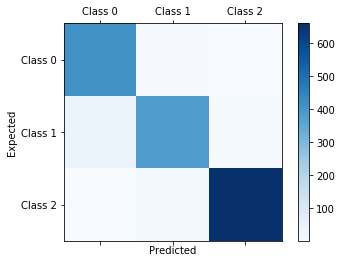


Optimized Model
------
Final accuracy score on the testing data: 0.9742
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       435
           1       0.93      0.98      0.96       420
           2       1.00      0.98      0.99       694

   micro avg       0.97      0.97      0.97      1549
   macro avg       0.97      0.97      0.97      1549
weighted avg       0.97      0.97      0.97      1549


Confunsion Matrix:


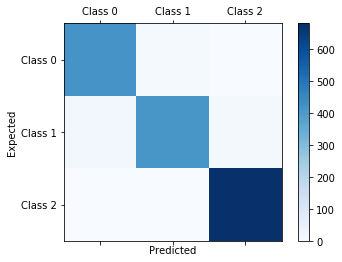

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# TODO: Inicializar o classificador
clf = RandomForestClassifier(random_state=0, n_estimators=10)

parameters = {"n_estimators": [1, 50, 100, 150], "min_samples_split":[2, 5, 7, 10, 13, 15]}
 
grid_obj = GridSearchCV(clf, param_grid=parameters, cv=5)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportar os scores de antes e de depois
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print(classification_report(predictions, y_test))
confusion_matrix_plot(y_test, predictions)

print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print(classification_report(best_predictions, y_test))
confusion_matrix_plot(y_test, best_predictions)